In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import sys
import rebound
sys.path.insert(1, '../SPOCKalt')
import plotFunctions
import simsetup

In [2]:
dataset = pd.read_csv('../modeldata/tryThetaSTDunwrap.csv')

In [3]:
dataset

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time
0,0,2.049650,0.013679,0.234941,0.002188,0.974706,309.146607,1.350010,1.483755,0.221502,0.300893,0.589043,True,False,1.235665e+07,8.315223e+07
1,1,1.938160,0.076051,0.388864,0.001233,0.069950,25.643597,1.299174,1.663194,0.190647,0.403777,0.671403,True,False,1.348749e+05,2.133072e+05
2,2,1.997951,0.002335,0.141684,0.004603,0.999966,0.775818,1.194251,2.256854,0.125660,0.720557,0.936762,True,False,1.276428e+04,9.321863e+03
3,3,1.993565,0.004385,0.076984,0.000052,0.329016,3.101180,1.342041,1.373228,0.216684,0.235460,0.503164,True,True,1.000000e+09,1.000000e+09
4,4,NaN,NaN,NaN,NaN,0.121660,NaN,1.051520,1.036905,0.024455,0.034058,0.059346,False,False,8.791890e+01,8.791890e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138538,138538,2.008604,0.003245,3.814043,0.068524,0.026189,0.126759,2.146925,1.125825,0.082222,0.664222,0.801058,True,False,6.990387e+05,8.267916e+05
138539,138539,1.891461,0.041741,0.204071,0.000258,0.100165,0.468492,1.399777,1.435985,0.251338,0.272822,0.592730,True,False,3.075749e+08,6.576003e+08
138540,138540,2.099445,0.049722,0.563941,0.005761,0.996531,0.208790,1.204069,1.597688,0.131799,0.366664,0.546790,True,False,1.193822e+07,3.363291e+07
138541,138541,1.786383,0.089323,0.122812,0.000538,0.998344,0.479796,1.330065,1.647766,0.209454,0.395073,0.687277,True,False,2.064407e+08,4.316851e+07


In [4]:
def hasnull(row):
    numnulls = row.isnull().sum()
    if numnulls == 0:
        return 0
    else:
        return 1

def tmax(row):
    #sim = get_sim(row, csvfolder)
    tmax = 1e4 # replace with a calculation of tmax
    return tmax

In [5]:
%%time
if 'hasnull' not in dataset.columns:
    dataset['hasnull'] = dataset.apply(hasnull, axis=1)
    #dataset['tmax'] = dataset.apply(tmax, axis=1)
    # dataset['tmax'] = dataset.apply(lambda x:1e4, axis=1) # this version would just set tmax=1e4 for all of them

    #dataset.to_csv(trainingdatafolder+"trainingdata.csv", encoding='ascii')

CPU times: user 5.91 s, sys: 20.1 ms, total: 5.93 s
Wall time: 5.93 s


In [6]:
mask = (dataset['hasnull'] == 0 )
filtData = dataset[mask]

In [12]:
filtData

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,dup
0,0,2.049650,0.013679,0.234941,0.002188,0.974706,309.146607,1.350010,1.483755,0.221502,0.300893,0.589043,True,False,1.235665e+07,8.315223e+07,0,False
1,1,1.938160,0.076051,0.388864,0.001233,0.069950,25.643597,1.299174,1.663194,0.190647,0.403777,0.671403,True,False,1.348749e+05,2.133072e+05,0,False
2,2,1.997951,0.002335,0.141684,0.004603,0.999966,0.775818,1.194251,2.256854,0.125660,0.720557,0.936762,True,False,1.276428e+04,9.321863e+03,0,False
3,3,1.993565,0.004385,0.076984,0.000052,0.329016,3.101180,1.342041,1.373228,0.216684,0.235460,0.503164,True,True,1.000000e+09,1.000000e+09,0,False
5,5,2.005946,0.003046,0.071558,0.000018,0.213067,423.884206,1.963686,1.906146,0.537356,0.568136,1.410783,True,True,1.000004e+09,1.000004e+09,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138538,138538,2.008604,0.003245,3.814043,0.068524,0.026189,0.126759,2.146925,1.125825,0.082222,0.664222,0.801058,True,False,6.990387e+05,8.267916e+05,0,False
138539,138539,1.891461,0.041741,0.204071,0.000258,0.100165,0.468492,1.399777,1.435985,0.251338,0.272822,0.592730,True,False,3.075749e+08,6.576003e+08,0,True
138540,138540,2.099445,0.049722,0.563941,0.005761,0.996531,0.208790,1.204069,1.597688,0.131799,0.366664,0.546790,True,False,1.193822e+07,3.363291e+07,0,False
138541,138541,1.786383,0.089323,0.122812,0.000538,0.998344,0.479796,1.330065,1.647766,0.209454,0.395073,0.687277,True,False,2.064407e+08,4.316851e+07,0,False


In [13]:
plot = filtData

In [14]:
plot['dup']=plot[['threeBRfillfac','EMcrossnear','instability_time','MEGNO']].duplicated()
plot = plot.drop(plot[plot['dup']==True].index)
plot = plot.drop(plot[plot['threeBRfillfac'] >20].index)
#plot = plot.drop(plot[plot['nearThetaSTD']>2].index)
# plot = plot.drop(plot[plot['3/2_order']>70].index)
# plot = plot.drop(plot[plot['MMRstrengthnear']<.5].index)


/tmp/ipykernel_40947/258478185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot['dup']=plot[['threeBRfillfac','EMcrossnear','instability_time','MEGNO']].duplicated()


In [15]:
plot

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,dup
0,0,2.049650,0.013679,0.234941,0.002188,0.974706,309.146607,1.350010,1.483755,0.221502,0.300893,0.589043,True,False,1.235665e+07,8.315223e+07,0,False
1,1,1.938160,0.076051,0.388864,0.001233,0.069950,25.643597,1.299174,1.663194,0.190647,0.403777,0.671403,True,False,1.348749e+05,2.133072e+05,0,False
2,2,1.997951,0.002335,0.141684,0.004603,0.999966,0.775818,1.194251,2.256854,0.125660,0.720557,0.936762,True,False,1.276428e+04,9.321863e+03,0,False
3,3,1.993565,0.004385,0.076984,0.000052,0.329016,3.101180,1.342041,1.373228,0.216684,0.235460,0.503164,True,True,1.000000e+09,1.000000e+09,0,False
5,5,2.005946,0.003046,0.071558,0.000018,0.213067,423.884206,1.963686,1.906146,0.537356,0.568136,1.410783,True,True,1.000004e+09,1.000004e+09,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138537,138537,11.855117,3.312267,0.974223,0.076465,0.451489,148.203750,1.500552,1.136822,0.089252,0.310694,0.427675,True,False,6.303165e+04,6.470086e+04,0,False
138538,138538,2.008604,0.003245,3.814043,0.068524,0.026189,0.126759,2.146925,1.125825,0.082222,0.664222,0.801058,True,False,6.990387e+05,8.267916e+05,0,False
138540,138540,2.099445,0.049722,0.563941,0.005761,0.996531,0.208790,1.204069,1.597688,0.131799,0.366664,0.546790,True,False,1.193822e+07,3.363291e+07,0,False
138541,138541,1.786383,0.089323,0.122812,0.000538,0.998344,0.479796,1.330065,1.647766,0.209454,0.395073,0.687277,True,False,2.064407e+08,4.316851e+07,0,False


In [16]:
import math
import numpy as np

In [17]:
import numpy as np
def plotfill(x):
    p1 = np.log10((x**(-1.5))*(1/(1-(x**(-1)))))
    p2 = math.sqrt(-np.log(1-(x**(-1))))
    return p1+p2

In [18]:
plotfill(1.1)

2.5278175491242747

In [19]:
fillList = np.linspace(1.0001,20,100000)
y = list(map(plotfill,fillList))
y = list(map(lambda x: (x)+5.5, y))

/tmp/ipykernel_40947/257262412.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=(np.log10(plot['nearThetaSTD']/1.8)), cmap=plt.cm.get_cmap("cool",7),vmin=0, vmax=2,alpha=.8)


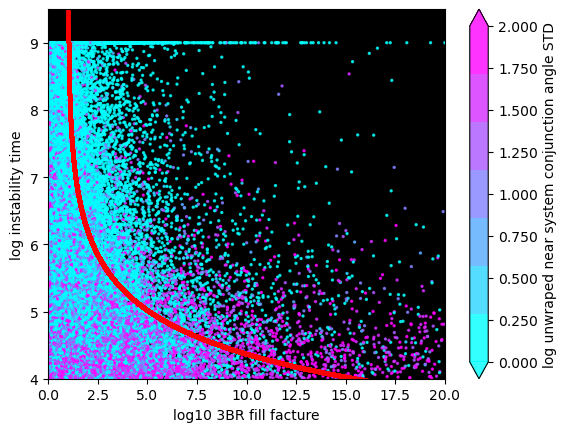

In [83]:
ax = plt.axes()
plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=(np.log10(plot['nearThetaSTD']/1.8)), cmap=plt.cm.get_cmap("cool",7),vmin=0, vmax=2,alpha=.8)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=4, c = 'red')
ax.set_xlim([0,20])
ax.set_ylim([4,9.5])
plt.xlabel("log10 3BR fill facture")
plt.ylabel("log instability time")
cbar.set_label('log unwraped near system conjunction angle STD')
ax.set_facecolor("black")


In [66]:
temp=plot

In [67]:
temp=temp.drop(temp[temp['instability_time']<1e9].index)

In [79]:
temp=temp.drop(temp[temp['threeBRfillfac']<7].index)

In [80]:
temp

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,dup
25695,25695,1.98796,0.00648,10.60805,0.295664,0.056294,22.902635,1.355222,1.059263,0.039129,0.224636,0.272555,True,True,1.000000e+09,1.000000e+09,0,False


In [70]:
temp=temp.drop(temp[np.log10(temp['nearThetaSTD']/1.8)<1].index)

In [77]:
temp

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,dup
6790,6790,2.001682,0.006539,2.353701,0.030214,0.001156,27.614970,1.460121,1.279341,0.178504,0.287072,0.516820,True,True,1.000000e+09,1.000000e+09,0,False
7576,7576,2.001204,0.000486,2.717475,0.022982,0.028937,59.604928,1.565223,1.072678,0.047884,0.348086,0.412638,True,True,1.000003e+09,6.912231e+08,0,False
9144,9144,1.997864,0.000391,2.076223,0.037297,0.016123,63.081076,1.715080,1.101078,0.066300,0.432814,0.527809,True,True,1.000004e+09,1.000004e+09,0,False
9331,9331,2.000468,0.000914,2.086840,0.037908,0.055067,86.059198,1.876768,1.233561,0.150232,0.521507,0.750085,True,True,1.000044e+09,1.397760e+08,0,False
9628,9628,1.950827,0.014693,2.021103,0.037608,0.009947,30.563219,1.447504,1.073145,0.048187,0.279618,0.341279,True,True,1.000000e+09,1.000000e+09,0,False
11232,11232,2.000260,0.000079,2.521863,0.031821,0.851804,103.216884,1.936804,1.126902,0.082906,0.553788,0.682606,True,True,1.000044e+09,1.000044e+09,0,False
13865,13865,2.026166,0.008207,2.438581,0.044632,0.036102,117.536290,1.627897,1.165256,0.107353,0.383837,0.532395,True,True,1.000014e+09,7.221186e+07,0,False
17881,17881,1.958453,0.004382,2.106387,0.057565,0.124555,31.081822,1.658617,1.091869,0.060345,0.401192,0.485748,True,True,1.000006e+09,9.947066e+07,0,False
18766,18766,2.286883,0.119278,2.042528,0.014186,0.161581,85.220517,1.578456,1.206052,0.133048,0.355673,0.536042,True,True,1.000030e+09,1.000030e+09,0,False
19903,19903,1.998332,0.001781,4.316220,0.038211,0.132942,49.767267,1.798008,1.059004,0.038959,0.478636,0.536242,True,True,1.000011e+09,4.788480e+08,0,False


<Axes: >

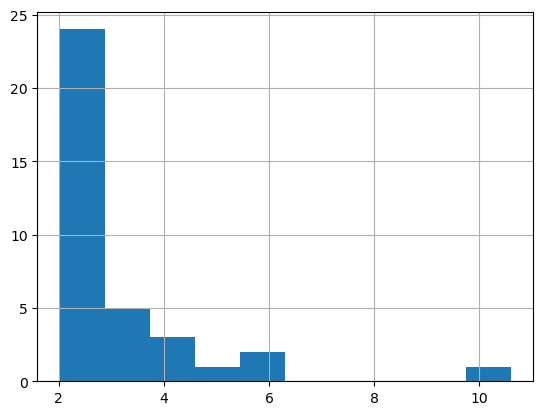

In [78]:
temp["threeBRfillfac"].hist()

/tmp/ipykernel_40947/2189497489.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(np.log10(temp['threeBRfillfac']),np.log10(temp['instability_time']), s=10, c=(np.log10(temp['nearThetaSTD']/1.8)), cmap=plt.cm.get_cmap("spring",20),alpha=1)


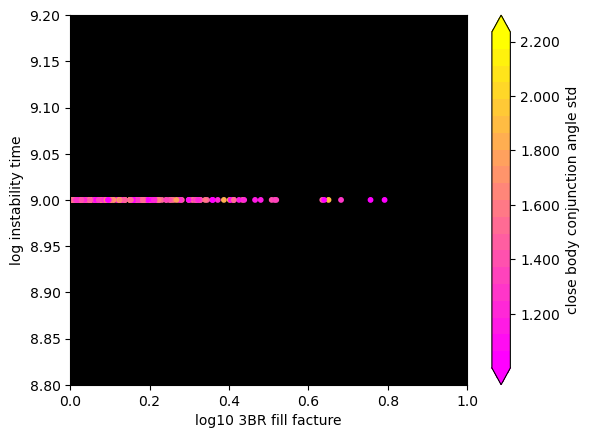

In [60]:
ax = plt.axes()
plt.scatter(np.log10(temp['threeBRfillfac']),np.log10(temp['instability_time']), s=10, c=(np.log10(temp['nearThetaSTD']/1.8)), cmap=plt.cm.get_cmap("spring",20),alpha=1)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=4, c = 'red')

ax.set_xlim([0,1])
ax.set_ylim([8.8,9.2])
plt.xlabel("log10 3BR fill facture")
plt.ylabel("log instability time")
cbar.set_label('close body conjunction angle std')
ax.set_facecolor("black")

In [36]:
initial = pd.read_csv('../modeldata/originalCondAllData.csv')

In [51]:
def getval( Pratio: list):
    maxorder = 9
    delta = 0.03
    minperiodratio = Pratio-delta
    maxperiodratio = Pratio+delta # too many resonances close to 1
    if maxperiodratio >.999:
        maxperiodratio =.999
    res = plotFunctions.resonant_period_ratios(minperiodratio,maxperiodratio, order=maxorder)
    val1 = [10000000,10]
    val2 = [10000000,10]
    for i,each in enumerate(res):
        if np.abs((each[0]/each[1])-Pratio)<np.abs((val2[0]/val2[1])-Pratio):
            #which = i
            
            val2 = each
        if np.abs((val2[0]/val2[1])-Pratio)<np.abs((val1[0]/val1[1])-Pratio):
            val1,val2 = val2,val1
    
    

    return val1,val2

In [63]:
def get_data(sim, Nint, Nout):
    '''gets dataframe '''
    times = np.linspace(0,Nint,Nout)
    data = pd.DataFrame()
    theta12 = np.zeros(Nout)
    theta23 = np.zeros(Nout)
    p2p1 = np.zeros(Nout)
    p3p2 = np.zeros(Nout)
    e1 = np.zeros(Nout)
    e2 = np.zeros(Nout)
    e3 = np.zeros(Nout)
    l1 = np.zeros(Nout)
    l2 = np.zeros(Nout)
    l3 = np.zeros(Nout)
    pomegarel12 = np.zeros(Nout)
    pomegarel23 = np.zeros(Nout)
    theta12a = np.zeros(Nout)
    theta23a = np.zeros(Nout)
    theta12b = np.zeros(Nout)
    theta23b = np.zeros(Nout)
    
    
    ps = sim.particles
    for i,each in enumerate(times):
        p2p1[i] = ((ps[2].P/ps[1].P))
        p3p2[i]=((ps[3].P/ps[2].P))
        e1[i]=(ps[1].e)
        e2[i]=(ps[2].e)
        e3[i]=(ps[3].e)
        l1[i]=(ps[1].l)
        l2[i]=(ps[2].l)
        l3[i]=(ps[3].l)
        pomegarel12[i]=(plotFunctions.getPomega(sim,1,2))
        pomegarel23[i]=(plotFunctions.getPomega(sim,2,3))

        sim.integrate(each, exact_finish_time=0)

    Pratio12 = 1/np.median(p2p1)
    Pratio32 = 1/np.median(p3p2)
    pval12a, pval12b = getval(Pratio12)
    pval23a, pval23b = getval(Pratio32)
    #print(pomegarel12)
    for x in range(Nout):
        theta12a[x]=plotFunctions.calcTheta(l1[x],l2[x],pomegarel12[x],pval12a)
        theta23a[x]=plotFunctions.calcTheta(l2[x],l3[x],pomegarel23[x],pval23a)
        theta12b[x]=plotFunctions.calcTheta(l1[x],l2[x],pomegarel12[x],pval12a)
        theta23b[x]=plotFunctions.calcTheta(l2[x],l3[x],pomegarel23[x],pval23a)
    
    theta12a = np.unwrap(theta12a)
    theta23a = np.unwrap(theta23a)
    theta12b = np.unwrap(theta12b)
    theta23b = np.unwrap(theta23b)
    theta12,pval12 = (lambda a,b: a if np.std(a[0])<np.std(b[0]) else b)((theta12a,pval12a),(theta12b,pval12b))
    theta23,pval23 = (lambda a,b: a if np.std(a[0])<np.std(b[0]) else b)((theta23a,pval23a),(theta23b,pval23b))
    #theta12 = np.mod(theta12,2*np.pi)
    #theta23 = np.mod(theta23,2*np.pi)
    # print(np.log10(np.std(theta12)/1.8))
    # print(np.log10(np.std(theta23)/1.8))

    data=pd.DataFrame({'time':times,'p2/p1':p2p1,'p3/p2':p3p2,'theta12':theta12,'theta23':theta23,'e1':e1,'e2':e2,'e3':e3})
    return data,pval12,pval23

In [65]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
def get_plot(num,Nout=5000,Nint=100000):
    sim = simsetup.get_simList(initial.iloc[num,2:])
    simsetup.init_sim_parameters(sim)
    figure = plt.figure(figsize=[20,35])
    gs = GridSpec(4, 2, figure=figure)
    #gs.update(wspace = .1, hspace = .1)
    
    data, res12, res23 = get_data(sim,Nout,Nint)
    ax1 = plt.subplot(gs[0,0])
    ax1.set_title('Stable:' +str(dataset['Stable'][num])+'   ID:'+str(num))
    data.plot.scatter(ax = ax1,x="p2/p1", y="p3/p2",s=2, c="time", colormap="copper", alpha=.35)
    ax2 = plt.subplot(gs[1,:2])
    ax2.set_title(str(res12[1])+':'+str(res12[0]))
    data.plot.scatter(ax=ax2,x="time", y="theta12",s=1)
    ax3 = plt.subplot(gs[2,:2])
    ax3.set_title(str(res23[1])+':'+str(res23[0]))
    data.plot.scatter(ax = ax3,x="time", y="theta23",s=1)
    ax4 = plt.subplot(gs[3,:2])
    data.plot(ax=ax4,x='time',y=['e1','e2','e3'])
    ax5 = plt.subplot(gs[0,1])
    ax5.set_title('threeBR fill:' +str(dataset['threeBRfillfac'][num]))
    ax5.set_aspect('equal')
    rebound.OrbitPlot(sim,fig=figure, ax=ax5,ylim=[-3,3],xlim=[-3,3])
    plt.savefig(f'imgs/'+str(np.log10(dataset['nearThetaSTD'][num]/1.8))+'.png')
    #plt.show(False)

    #return figure
from multiprocessing import Pool

#%%

systems = temp['index']




if __name__ == "__main__":  # confirms that the code is under main function

  

    
    #bound = test = np.linspace(0, 138543, num=138544, endpoint=True, retstep=False, dtype=int, axis=0)
    with Pool() as p:
        p.map(get_plot, systems)

/home/ethadhani/summerSPOCK/datafilt/../SPOCKalt/simsetup.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sim.add(m=data[0], x=data[1], y=data[2], z=data[3], vx=data[4], vy=data[5], vz=data[6])
/home/ethadhani/summerSPOCK/datafilt/../SPOCKalt/simsetup.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sim.add(m=data[0], x=data[1], y=data[2], z=data[3], vx=data[4], vy=data[5], vz=data[6])
/home/ethadhani/summerSPOCK/datafilt/../SPOCKalt/simsetup.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

In [30]:
findstd = []
x = np.linspace(0,1000,1000)
for i in x:
    findstd.append(np.pi+3*np.cos(x*100))

print(np.std(findstd))


2.1224617628594427


In [31]:
findstd=[]
x = np.linspace(0,1000,1000)
for i in x:
    findstd.append(np.mod(10*x,2*np.pi))

print(np.std(findstd))


1.8146636641196545
